<a href="https://colab.research.google.com/github/michaelkhan3/tensorflow_cert_checklist/blob/colab-test/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification

## Get data

In this binary classification exercise we will use a dataset of images of cats and dogs.

We can get the data using wget.

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-08-17 07:39:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   149MB/s    in 0.4s    

2020-08-17 07:39:05 (149 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip data and set up directories

In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

validation_dir = os.path.join(base_dir, 'validation')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')


## Setup image data generator
<a id='setup-image-data-generator'></a>

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Binary classification model

There are two important steps to make a model a __binary classification__ mode:


### 1. The last layer of the model 

The job of the last layer of the model is usually to convert all the calculations of the neural network into the output you are looking for, in this case __cat or dog__


For binary classification the last layer has just one neuron and uses the sigmoid activation function.

`tf.keras.layers.Dense(1, activation='sigmoind')`

The softmax activation makes it so that the neuron can give us 2 distinct outputs, in this case 0 or 1, dog or cat.

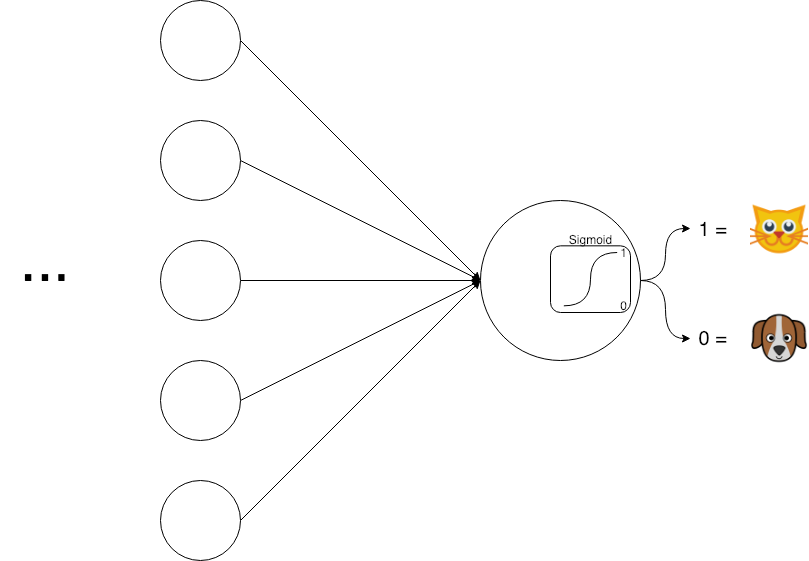

It is also possible do use 2 neurons and softmax activation for binary classification, but using just one neuron and sigmoid activation is usually more efficient.

### 2. Use the correct loss function

We use __binary crossentropy__ as the loss function for __binary classification__.


### 3. Honorable mention 

Make sure the labels for you data are in the correct format.
In this example we used TensorFlow's `ImageDataGenerator` to get our images and labels. When calling `flow_from_directory` we must choose `class_mode='binary'`.
To see the code go to [Setup Image data generator](#setup-image-data-generator)

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [7]:
binary_classification_model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                            #  Final layer has 1 neuron with simoid activation
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [8]:
binary_classification_model.compile(
    optimizer=RMSprop(lr=1e-4),
    # Use binary crossentropy loss for binary classification
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [9]:
history = binary_classification_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6913 - accuracy: 0.5120 - val_loss: 0.6762 - val_accuracy: 0.5290
Epoch 2/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6650 - accuracy: 0.5980 - val_loss: 0.6413 - val_accuracy: 0.6310
Epoch 3/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6179 - accuracy: 0.6590 - val_loss: 0.6151 - val_accuracy: 0.6580
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5769 - accuracy: 0.7005 - val_loss: 0.5968 - val_accuracy: 0.6730
Epoch 5/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5437 - accuracy: 0.7265 - val_loss: 0.5723 - val_accuracy: 0.6940
Epoch 6/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5157 - accuracy: 0.7400 - val_loss: 0.7280 - val_accuracy: 0.6050
Epoch 7/100
100/100 [==============================] - 8s 84ms/step - loss: 0.4944 - accuracy: 0.7560 - val_loss: 0.5492 - val_accuracy: